In [1]:
!wget http://www.ecuadorencifras.gob.ec/documentos/datos/Poblacion_y_Demografia/entradas_salidas_internac/CSV/bdd_entradas_salidas_internacionales_2017_CSV.zip

--2018-07-21 10:15:30--  http://www.ecuadorencifras.gob.ec/documentos/datos/Poblacion_y_Demografia/entradas_salidas_internac/CSV/bdd_entradas_salidas_internacionales_2017_CSV.zip
Resolving www.ecuadorencifras.gob.ec (www.ecuadorencifras.gob.ec)... 190.152.152.79
Connecting to www.ecuadorencifras.gob.ec (www.ecuadorencifras.gob.ec)|190.152.152.79|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83413023 (80M) [application/zip]
Saving to: ‘bdd_entradas_salidas_internacionales_2017_CSV.zip’

bdd_entradas_salida 100%[===================>]  79.55M   378KB/s    in 4m 37s  

2018-07-21 10:20:08 (294 KB/s) - ‘bdd_entradas_salidas_internacionales_2017_CSV.zip’ saved [83413023/83413023]



In [2]:
!mkdir ecuador-migration-data-2017

In [3]:
!unzip bdd_entradas_salidas_internacionales_2017_CSV.zip -d ecuador-migration-data-2017/

Archive:  bdd_entradas_salidas_internacionales_2017_CSV.zip
   creating: ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/
  inflating: ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/Diccionario ESI 2017.xls  
  inflating: ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/ESI_2017.csv  
  inflating: ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/Metadatos ESI 2017.xls  


In [4]:
!head ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/ESI_2017.csv

In [5]:
!file -i ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/ESI_2017.csv

ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/ESI_2017.csv: text/plain; charset=iso-8859-1


In [6]:
ECMI2017='ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/ESI_2017.csv'

## Character encoding issues
The dataset was originally encoded on the ISO-8859-1 standard.  I converted the dataset to UTF-8 for proper display of accents and Spanish characters used by the entity who collected such data.

In [7]:
!iconv -f ISO-8859-1 -t UTF-8//TRANSLIT $ECMI2017 -o ECMI2017_utf.csv

In [8]:
!head ECMI2017_utf.csv

## Smaller samples to process data faster
By slicing the first hundred thousand and million records I was able to process sample cells to achieve faster results

In [1]:
!head -n 1000000 ECMI2017_utf.csv > ECMI2017_utf_1m.csv

In [1]:
!head -n 100000 ECMI2017_utf.csv > ECMI2017_utf_1th.csv

In [3]:
!head ECMI2017_utf_1m.csv

In [63]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
inout2017 = pd.read_csv('ECMI2017_utf.csv', names=['cod_estd' , 'secuencial' , 'tip_movi' , 'tip_naci' , 'anio_movi' , 'mes_movi' , 'dia_movi' , 'sex_migr' , 'nac_migr' , 'subcont_nac' , 'cont_nac' , 'via_tran' , 'mot_viam' , 'pais_prod' , 'subcont_prod' , 'cont_prod' , 'lug_prod' , 'pais_res' , 'subcont_res' , 'cont_res' , 'jef_migr' , 'pro_jefm' , 'can_jefm' , 'cla_migr' , 'ocu_migr' , 'edad' , 'pais_esc' , 'lug_esc'
], sep=';')

/home/suprematis/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1,4,6,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
inout2017

,cod_estd,secuencial,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,subcont_nac,...,subcont_res,cont_res,jef_migr,pro_jefm,can_jefm,cla_migr,ocu_migr,edad,pais_esc,lug_esc
0,cod_estd,secuencial,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,subcont_nac,...,subcont_res,cont_res,jef_migr,pro_jefm,can_jefm,cla_migr,ocu_migr,edad,pais_esc,lug_esc
1,ESI,1,Entrada,Extranjero,2017,Octubre,1,Hombre,Sin especificar,Sin especificar,...,Europa Meridional,Europa,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,36,Países Bajos,Amsterdam
2,ESI,2,Entrada,Extranjero,2017,Junio,8,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,45,Estados Unidos de América,Miami Florida
3,ESI,3,Entrada,Extranjero,2017,Mayo,28,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Directores generales y gerentes generales,37,Países Bajos,Amsterdam
4,ESI,4,Entrada,Extranjero,2017,Marzo,13,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,No inmigrante T-3,Directores generales y gerentes generales,42,Países Bajos,Amsterdam
5,ESI,5,Entrada,Extranjero,2017,Julio,2,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Amas de casa,44,Estados Unidos de América,Dallas Texas
6,ESI,6,Entrada,Extranjero,2017,Mayo,12,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Tecnicos en ciencias fisicas y en ingenieria n...,54,Estados Unidos de América,Houston Texas
7,ESI,7,Entrada,Extranjero,2017,Febrero,6,Mujer,Zambia,África Oriental,...,América del Sur,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,Inmigrantes 10-VI,Amas de casa,41,Estados Unidos de América,Dallas Texas
8,ESI,8,Entrada,Extranjero,2017,Diciembre,25,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,47,Panamá,Panamá City
9,ESI,9,Entrada,Extranjero,2017,Mayo,23,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Miembros del poder ejecutivo y de los gobierno...,43,Panamá,Panamá City


## Removing header row
I sliced the data with pandas in order to obtain a dataframe that excludes the header row from the data to be analyzed.

In [4]:
##Removed header row to process data
inout2017_noheader = inout2017.iloc[1:]

In [5]:
inout2017_noheader

,cod_estd,secuencial,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,subcont_nac,...,subcont_res,cont_res,jef_migr,pro_jefm,can_jefm,cla_migr,ocu_migr,edad,pais_esc,lug_esc
1,ESI,1,Entrada,Extranjero,2017,Octubre,1,Hombre,Sin especificar,Sin especificar,...,Europa Meridional,Europa,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,36,Países Bajos,Amsterdam
2,ESI,2,Entrada,Extranjero,2017,Junio,8,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,45,Estados Unidos de América,Miami Florida
3,ESI,3,Entrada,Extranjero,2017,Mayo,28,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Directores generales y gerentes generales,37,Países Bajos,Amsterdam
4,ESI,4,Entrada,Extranjero,2017,Marzo,13,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,No inmigrante T-3,Directores generales y gerentes generales,42,Países Bajos,Amsterdam
5,ESI,5,Entrada,Extranjero,2017,Julio,2,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Amas de casa,44,Estados Unidos de América,Dallas Texas
6,ESI,6,Entrada,Extranjero,2017,Mayo,12,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Tecnicos en ciencias fisicas y en ingenieria n...,54,Estados Unidos de América,Houston Texas
7,ESI,7,Entrada,Extranjero,2017,Febrero,6,Mujer,Zambia,África Oriental,...,América del Sur,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,Inmigrantes 10-VI,Amas de casa,41,Estados Unidos de América,Dallas Texas
8,ESI,8,Entrada,Extranjero,2017,Diciembre,25,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,47,Panamá,Panamá City
9,ESI,9,Entrada,Extranjero,2017,Mayo,23,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Miembros del poder ejecutivo y de los gobierno...,43,Panamá,Panamá City
10,ESI,10,Entrada,Extranjero,2017,Junio,26,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Profesionales de la ensenanza no clasificados ...,38,Países Bajos,Amsterdam


## "Movement" Type
Ecuadorian immigration authorities refer to a person entering or exiting the country with the category "tip_movi" which I believe is an abbreviated term for *"Tipo de Movimiento"* or *"Movement type"* in English. I want to determine if the dataset contains entry and exit data.

In [6]:
inout2017_noheader['tip_movi'].nunique()

2

In [7]:
inout2017_noheader.groupby(['tip_movi']).groups.keys()


['Entrada', 'Salida']

In [8]:
entry_exit_EC_2017 = inout2017_noheader.groupby('tip_movi')['tip_movi'].count()
entry_exit_EC_2017

tip_movi
Entrada    3114763
Salida     3065412
Name: tip_movi, dtype: int64

The number of people entering and exiting the country is almost identical

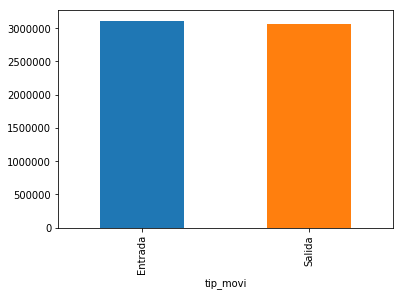

In [42]:
entry_exit_EC_2017.plot.bar()

## Where are people coming from
The "nac_migr" variable contains data of the nationality of the person admitted for entry to Ecuador.  I want to quantify the number of countries visiting Ecuador.

In [9]:
inout2017_noheader['nac_migr'].nunique()

222

## Unique country count
There are records for 222 different countries.  Although this metric would need to be verified with a list of official countries, I will continue to count the number of entries and exits per country to gain more perspective of where are people coming from to Ecuador.

In [25]:
bycountry_count = inout2017_noheader.groupby(['tip_movi', 'nac_migr'], sort=True).tip_movi.count().reset_index(name="count")
bycountry_count

,tip_movi,nac_migr,count
0,Entrada,Afganistán,173
1,Entrada,Albania,210
2,Entrada,Alemania,33439
3,Entrada,Andorra,38
4,Entrada,Angola,257
5,Entrada,Anguila,9
6,Entrada,Antigua República Yugoslava de Macedonia,90
7,Entrada,Antigua y Barbuda,33
8,Entrada,Arabia Saudita,277
9,Entrada,Argelia,142


## Isolate Ingress Only
I wanted to subset the data to only include country ingress.  This code allows for that specific subset.

In [35]:
entry_by_country = bycountry_count[bycountry_count['tip_movi'].str.match('Entrada')]
entry_by_country
#bycountry_count.filter(like='Entrada', axis=1)
#df = bycountry_count.loc[['Entrada']]
#df

,tip_movi,nac_migr,count
0,Entrada,Afganistán,173
1,Entrada,Albania,210
2,Entrada,Alemania,33439
3,Entrada,Andorra,38
4,Entrada,Angola,257
5,Entrada,Anguila,9
6,Entrada,Antigua República Yugoslava de Macedonia,90
7,Entrada,Antigua y Barbuda,33
8,Entrada,Arabia Saudita,277
9,Entrada,Argelia,142


## After sorting, interesting facts surface
Once the values were sorted to show the top ten countries with the most ingress to Ecuador, it shows that the highest count is the of citizens from Ecuador.  In later cell I exclude Ecuador from the result, since we want to focus on actual foreign individuals entering the country.

In [47]:
entry_by_country_sorted = entry_by_country.sort_values(['count'], ascending=False)
top_ten_entry = entry_by_country_sorted[['nac_migr','count']].head(10)
top_ten_entry

,nac_migr,count
51,Ecuador,1506290
42,Colombia,330671
214,Venezuela,287972
59,Estados Unidos de América,244600
156,Perú,139116
58,España,58727
10,Argentina,44662
39,Chile,44522
2,Alemania,33439
40,China,30147


In [48]:
#forn stands for "foreign", not from Ecuador
top_ten_entry_forn = top_ten_entry.iloc[1:]
top_ten_entry_forn

,nac_migr,count
42,Colombia,330671
214,Venezuela,287972
59,Estados Unidos de América,244600
156,Perú,139116
58,España,58727
10,Argentina,44662
39,Chile,44522
2,Alemania,33439
40,China,30147


## Labels in Spanish
Labels in this plot are in Spanish to maintain consistency with the original data.

TypeError: 'Text' object is not callable

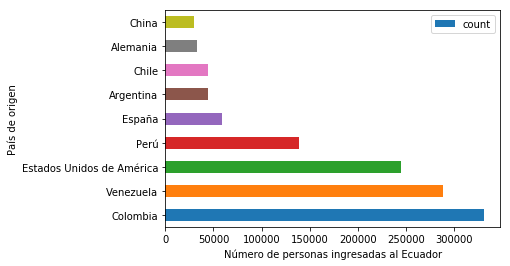

In [76]:
plt = top_ten_entry_forn.plot.barh(x='nac_migr', y='count')
plt.set_xlabel(u'Número de personas ingresadas al Ecuador')
plt.set_ylabel(u'País de origen')
plt.legend()
plt.title(u'Top 10 de países con mayor número de ingresos al Ecuador en 2017')
plt.show()